In [9]:
import math
import numpy as np
import pandas as pd
import pints
import matplotlib.pyplot as plt
import os
plt.rcParams.update({'font.size': 24})
from Newton_model_numba import wrappedNewton, newtonRaphsonFT

In [10]:
# specifing data location and folder for outputs

data_name = 'data_90992'
file_name = data_name + '.txt'
folder = os.path.join('Data', 'processed')
folder = os.path.join(folder, 'old')
data_file = os.path.join(folder, file_name)

# opening data
experimental_data = pd.read_csv(data_file, sep='\t')

exp_times = np.asarray(experimental_data.times)
exp_current = np.asarray(experimental_data.current)

In [11]:
dims = exp_current.shape
measurements = int(dims[0]/2)
print('measurements: ', measurements)
if dims[0]%2 !=0:
    print('*'*30+'\nerror must have evennumber of measurments\n'+'*'*40)

# declaring model to obtain non dimensinalise constant

trial = newtonRaphsonFT(startPotential= -0.15, revPotential = -0.75, rateOfPotentialChange = -22.35e-3, numberOfMeasurements = measurements)

# non-diming experimental data
exp_current_dimless = exp_current/trial.I0

# model for optimsation
model = wrappedNewton(numberOfMeasurements = measurements, initaldiscard = 0.025, enddiscard = 0.875)
real_parameters = [3.63797445569529376e+00, 3.99999999763002734e+03, -2.70000000000016727e-01, -4.48542730136352485e-01, -3.46272673434245837e-02, 1.97456736893905527e+00]
real_parameters = np.asarray(real_parameters)

measurements:  45496


In [12]:
FT_reduced_exp = model.FT_and_reduce_to_harmonics_4_to_12(exp_current_dimless)
Ft_reduced_sim = model.simulate_reduced_FT_current(parameters= real_parameters, times = exp_times)

freq = model.frequencies_for_harmonics_4_to_12(times =exp_times)

full_sim = model.simulate(parameters= real_parameters, times = exp_times)


freq.shape:  (4550,)
freq[0]:  21.22215354813801
freq[-1]]:  106.12943278338851
space per harmonic: 379.1666666666667
center of first harmonic and this index:  303
center of 2nd harmonic and this index:  874
freq_org[0]:  0.0
center of first harmonic and this index:  481
center of first harmonic absolute:  480
center of first harmonic and this index:  157
center of first harmonic and this index:  163


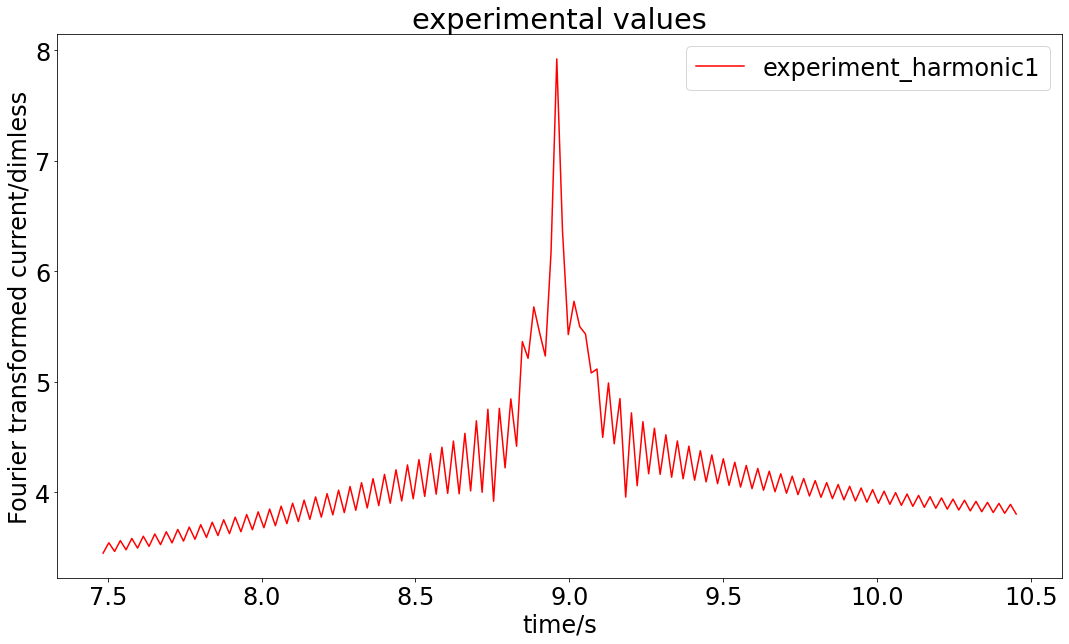

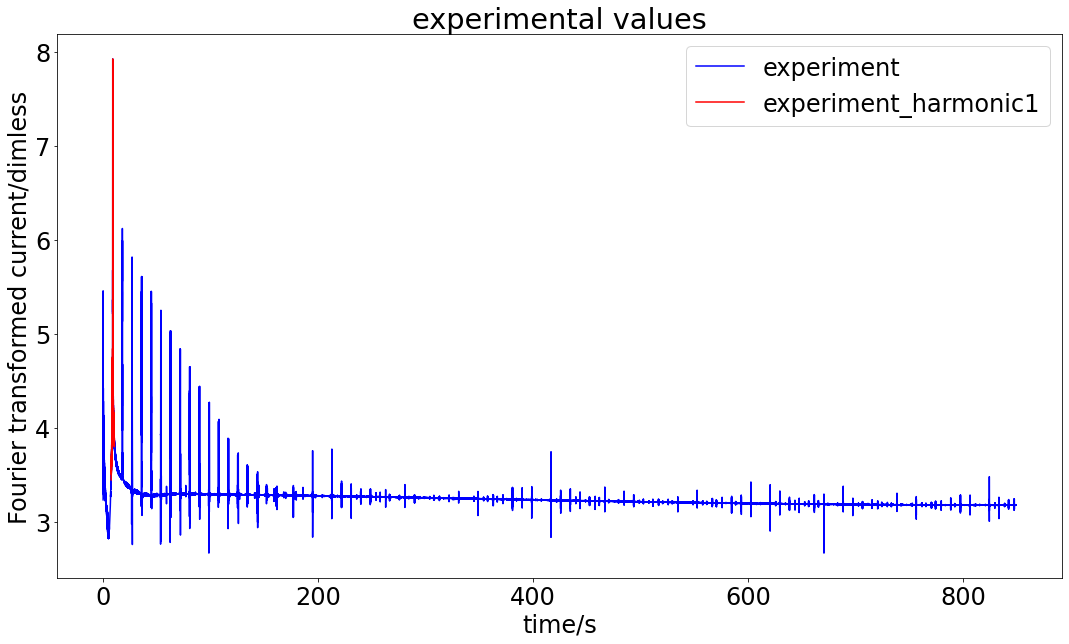

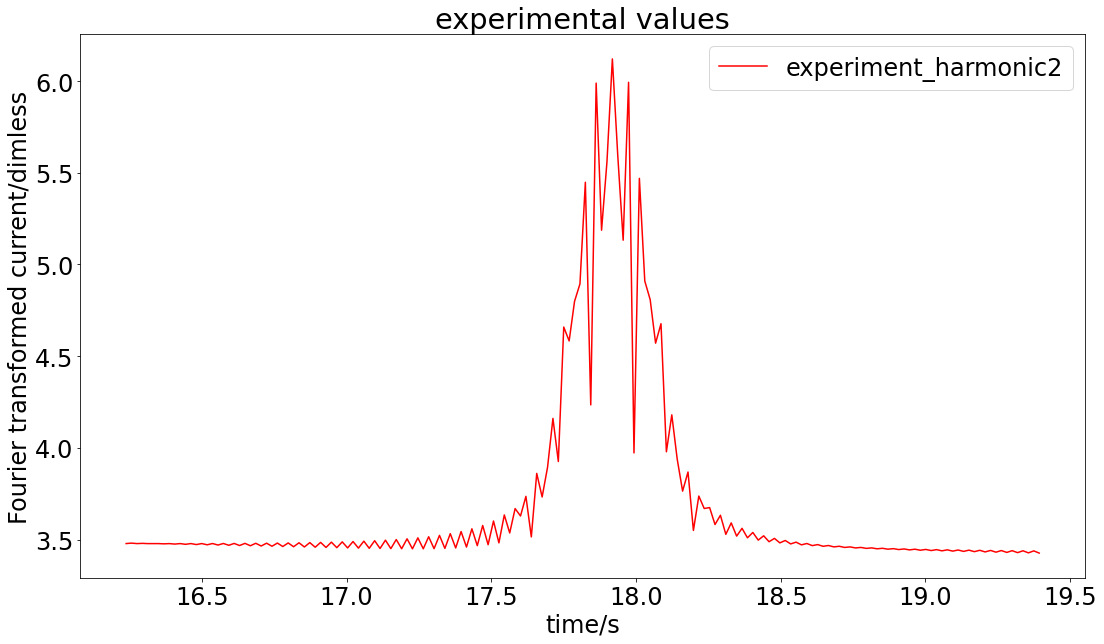

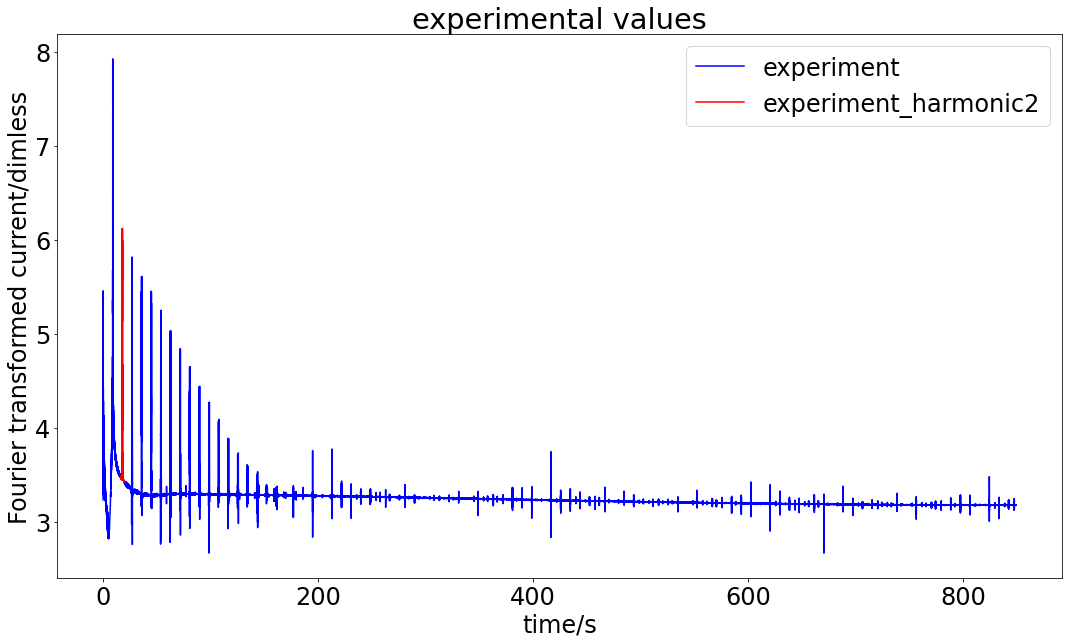

In [13]:
print('freq.shape: ', freq.shape)
print('freq[0]: ', freq[0])
print('freq[-1]]: ', freq[-1])
print('space per harmonic:', (4550/12) )
# temp = freq[1]-freq[0]
# dims = freq.shape
# temp2 = (freq[-1]-freq[0])/dims[0]
# print('spacing: ', 1.5/temp)
# print('spacing: ', 1.5/temp2)
# 81 = 1.5 hz
print('center of first harmonic and this index: ', np.argmax(FT_reduced_exp))
cut4th = FT_reduced_exp[383:]
print('center of 2nd harmonic and this index: ', np.argmax(cut4th.real))

sp = np.fft.fft(full_sim)
fullFT = sp[:measurements] #discarding -ve frequencies
freq_org = np.fft.fftfreq(exp_times.shape[-1], d= exp_times[1])
print('freq_org[0]: ', freq_org[0])
freq_org=freq_org[:measurements]

print('center of first harmonic and this index: ', np.argmax(fullFT))
print('center of first harmonic absolute: ', np.argmax(np.absolute(fullFT)))
skip = np.argmax(fullFT) + 800
cut2st = np.absolute(fullFT[skip:])
print('center of first harmonic and this index: ', np.argmax(fullFT[skip:]))
print('center of first harmonic and this index: ', np.argmax(cut2st))

exp_plot = fullFT[401:561]
sim_plot = fullFT[401:561]
xaxis = freq_org[401:561] #model.potentialRange
xaxislabel = "time/s" # "potential/V"

plt.figure(figsize=(18,10))
plt.title("experimental values")
plt.ylabel("Fourier transformed current/dimless")
plt.xlabel(xaxislabel)
plt.plot(xaxis, np.log10(exp_plot),'r', label='experiment_harmonic1')
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(18,10))
plt.title("experimental values")
plt.ylabel("Fourier transformed current/dimless")
plt.xlabel(xaxislabel)
plt.plot(freq_org, np.log10(fullFT),'b', label='experiment')
plt.plot(xaxis, np.log10(exp_plot),'r', label='experiment_harmonic1')
plt.legend(loc='best')
plt.show()

exp_plot = fullFT[870:1040]
sim_plot = fullFT[870:1040]
xaxis = freq_org[870:1040] #model.potentialRange
xaxislabel = "time/s" # "potential/V"

plt.figure(figsize=(18,10))
plt.title("experimental values")
plt.ylabel("Fourier transformed current/dimless")
plt.xlabel(xaxislabel)
plt.plot(xaxis, np.log10(exp_plot),'r', label='experiment_harmonic2')
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(18,10))
plt.title("experimental values")
plt.ylabel("Fourier transformed current/dimless")
plt.xlabel(xaxislabel)
plt.plot(freq_org, np.log10(fullFT),'b', label='experiment')
plt.plot(xaxis, np.log10(exp_plot),'r', label='experiment_harmonic2')
plt.legend(loc='best')
plt.show()

arg max give :  481
spacing bewteen harmonics is therefore :  480


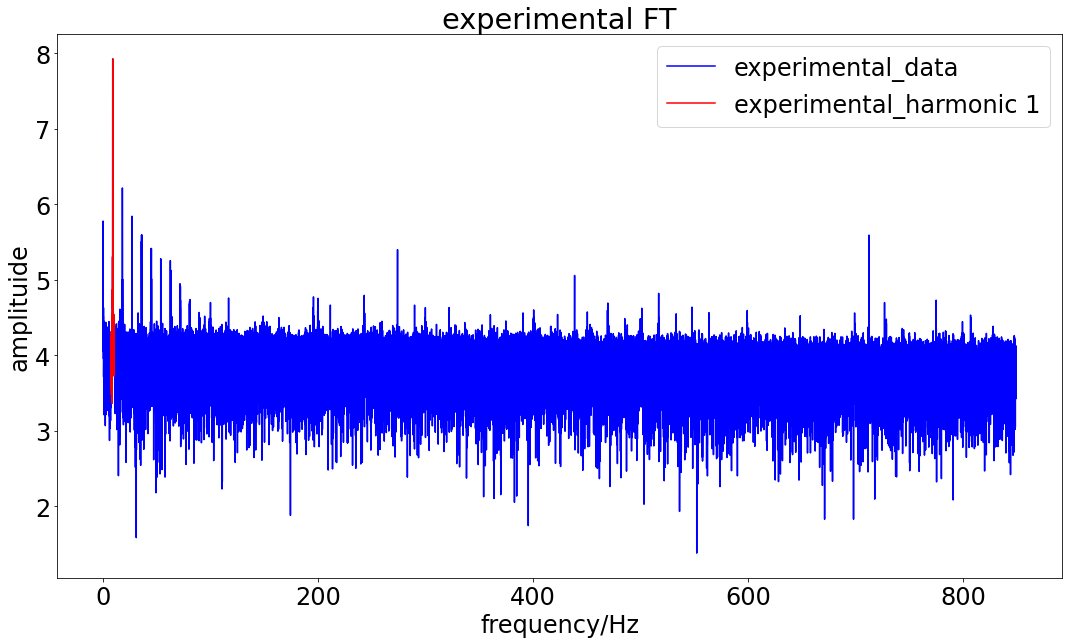

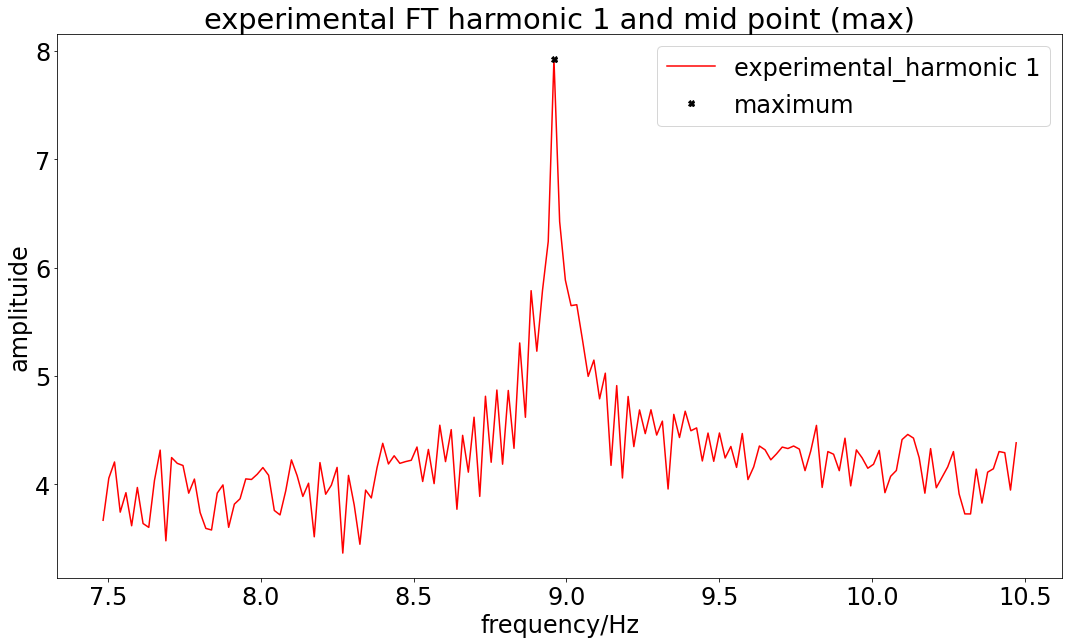

In [14]:
spacing = model.harmonic_spacing(exp_current_dimless, exp_times)

**********cacluating harmonic spacing**********
arg max give :  481
spacing bewteen harmonics is therefore :  480


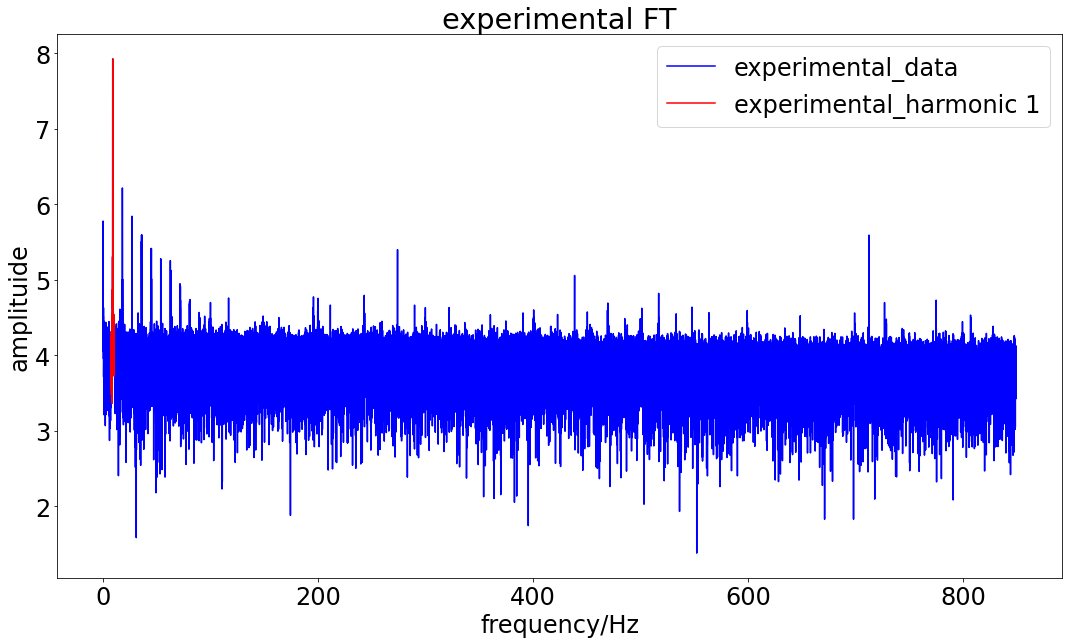

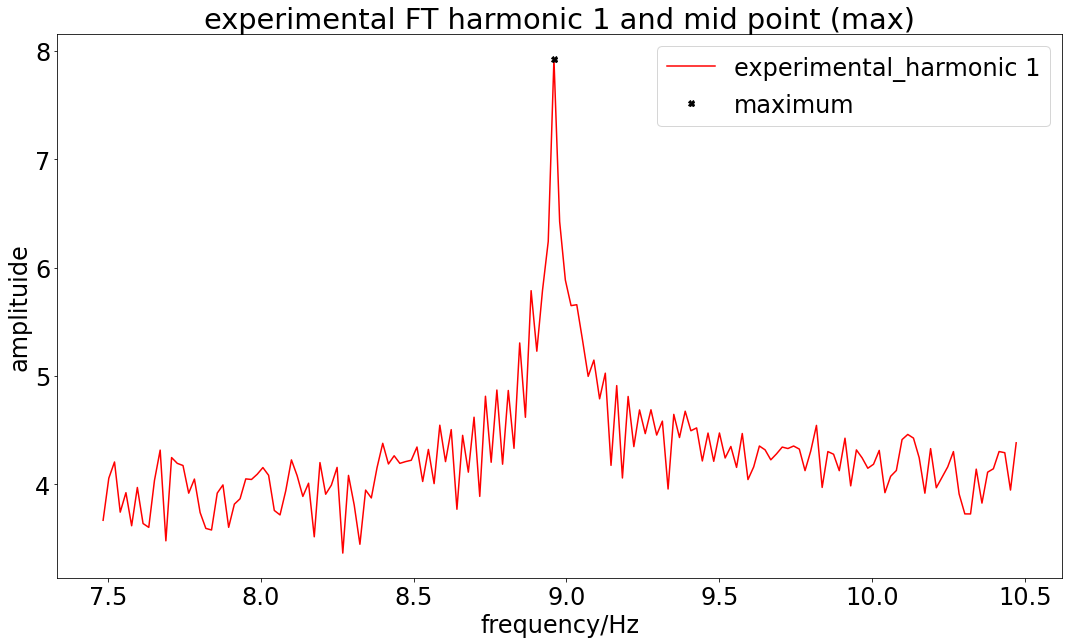

Spacing between harmonics:  480

**********cacluating location of 4th harmonic**********
mid point index of 4th harmonic:  303

**********index distance of 0.6Hz**********
index window covering 0.6Hz:  32.145653759999995
int index window covering 0.6Hz:  32.0
sim_plot.shape: (65,)
mid_upper_sim_plot.shape: (33,)
lower_sim_plot.shape: (32,)


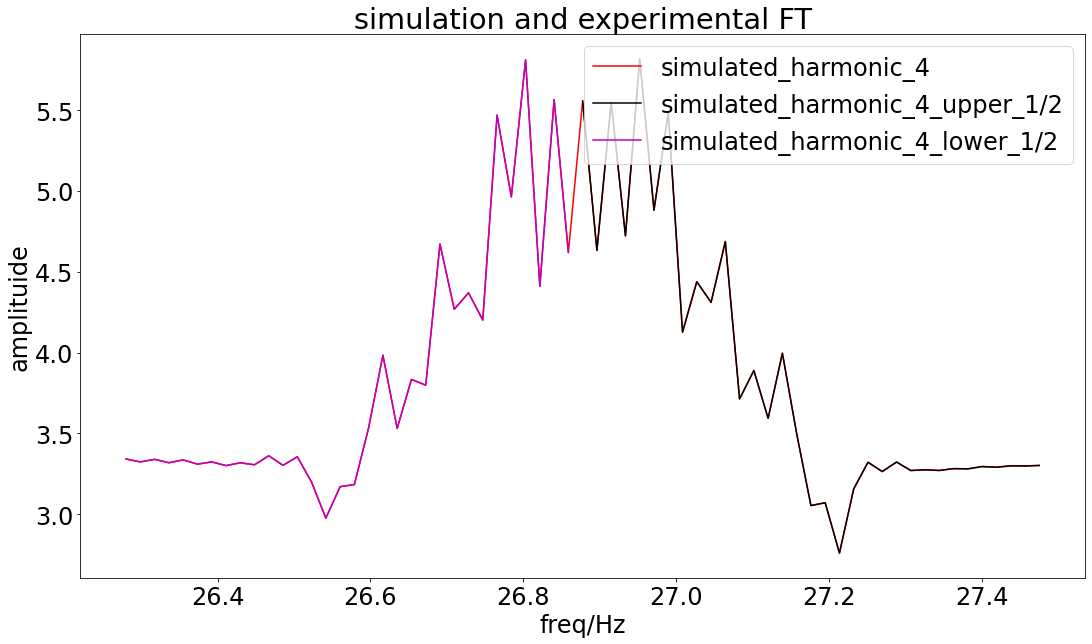

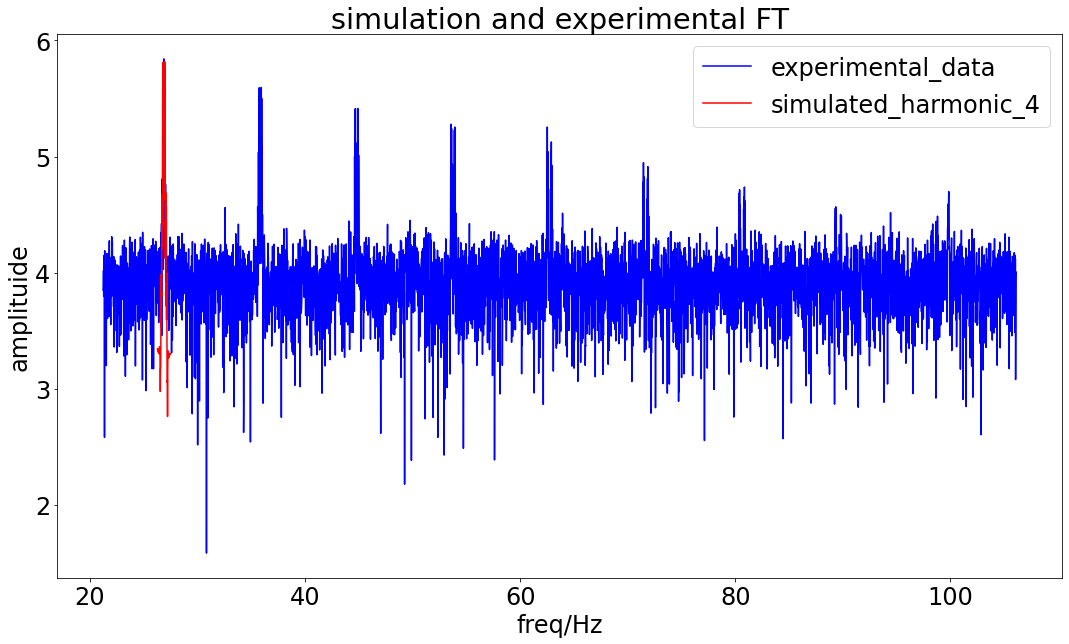

sim_plot.shape: (65,)
mid_upper_sim_plot.shape: (33,)
lower_sim_plot.shape: (32,)


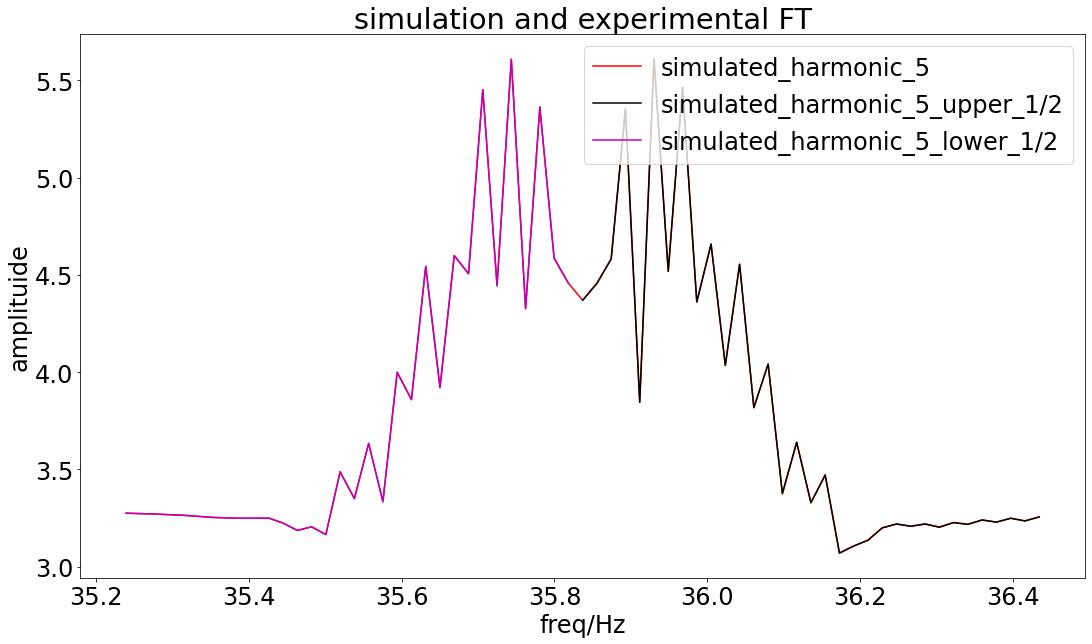

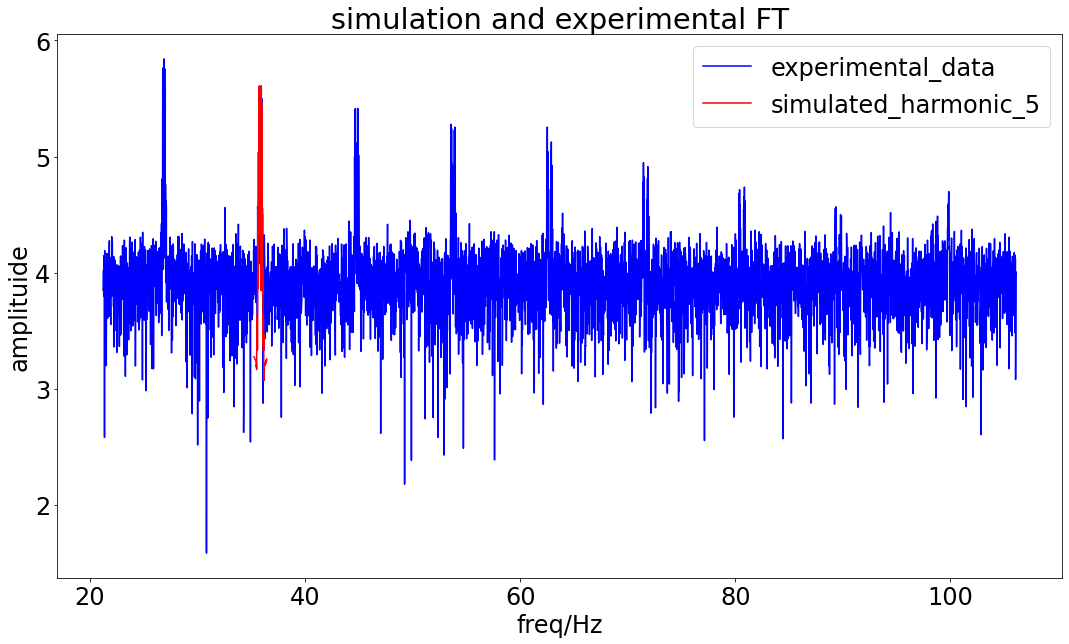

sim_plot.shape: (65,)
mid_upper_sim_plot.shape: (33,)
lower_sim_plot.shape: (32,)


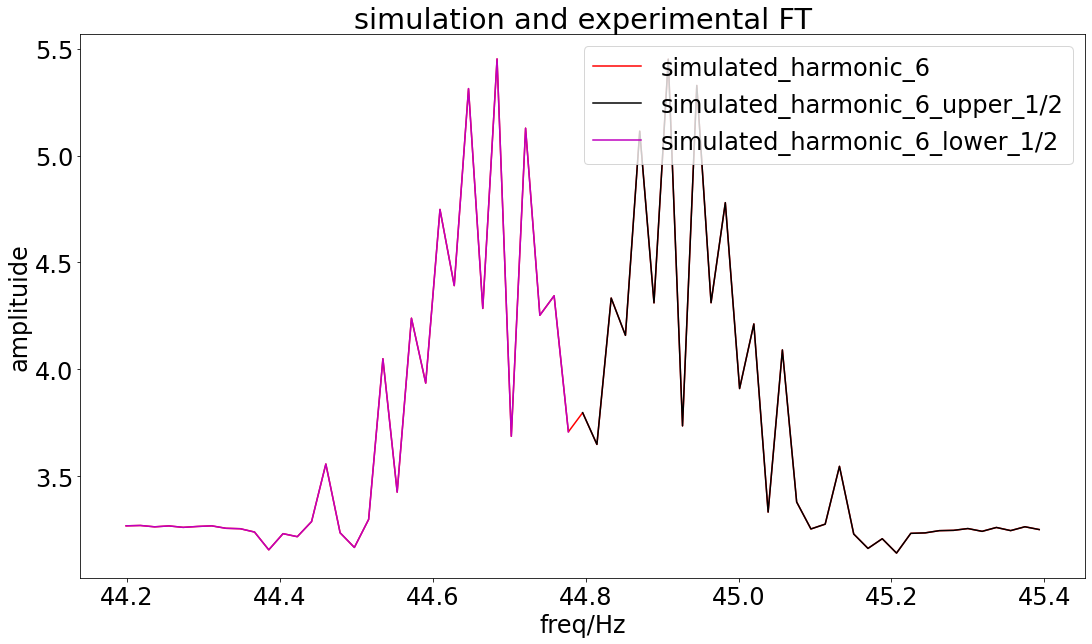

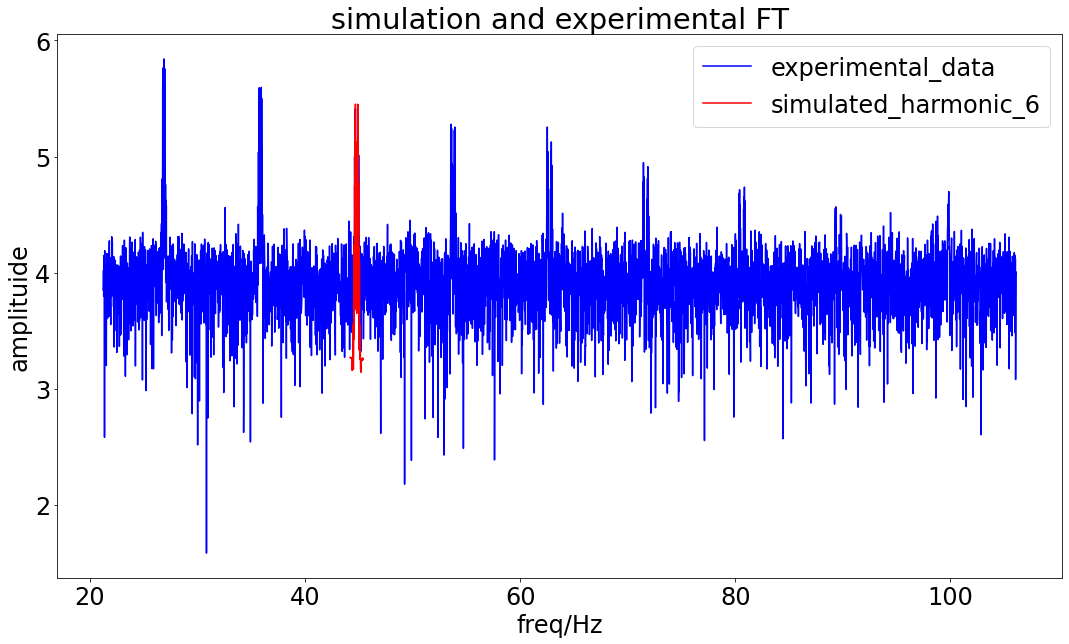

sim_plot.shape: (65,)
mid_upper_sim_plot.shape: (33,)
lower_sim_plot.shape: (32,)


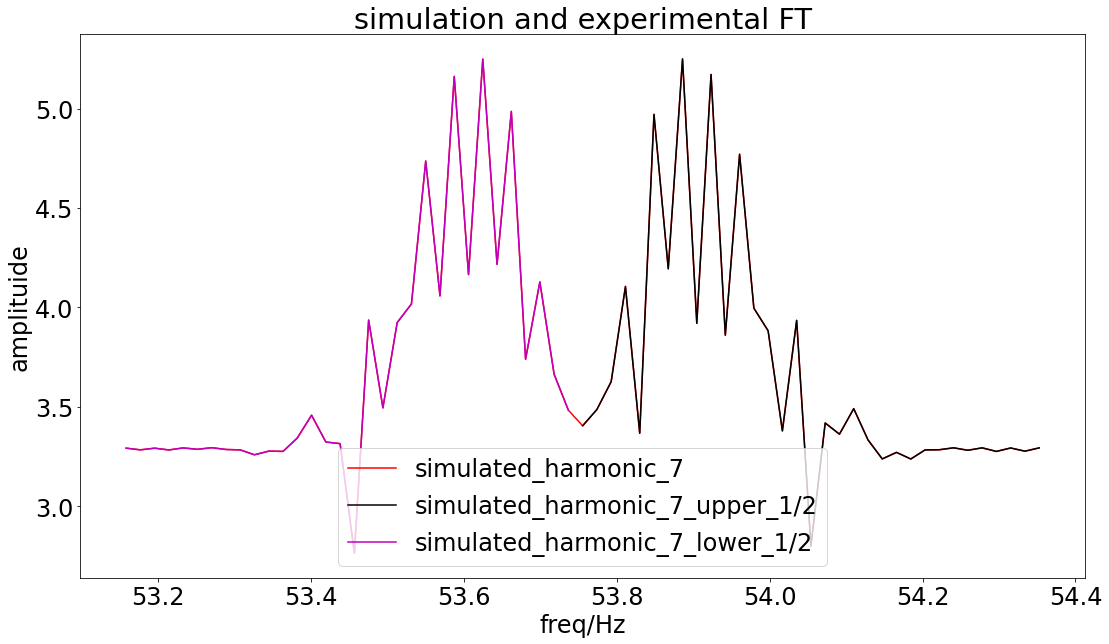

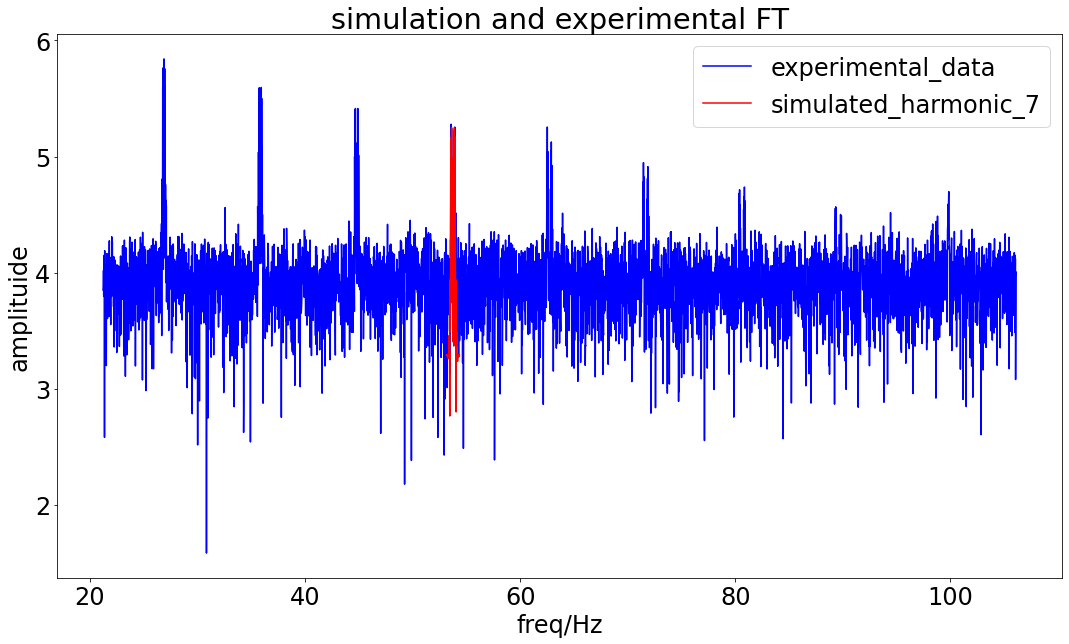

sim_plot.shape: (65,)
mid_upper_sim_plot.shape: (33,)
lower_sim_plot.shape: (32,)


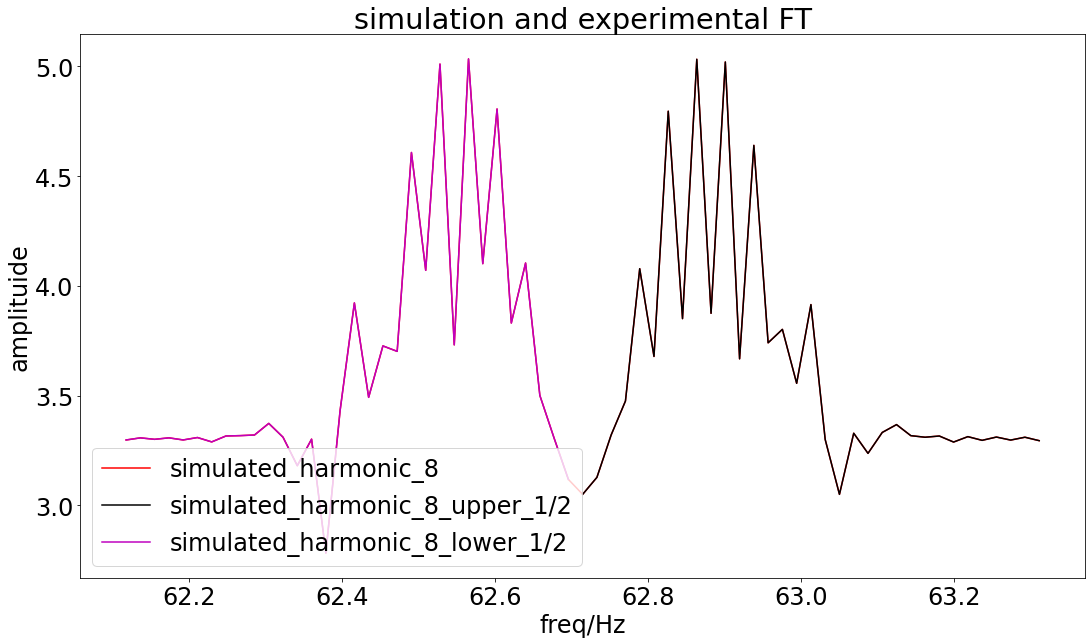

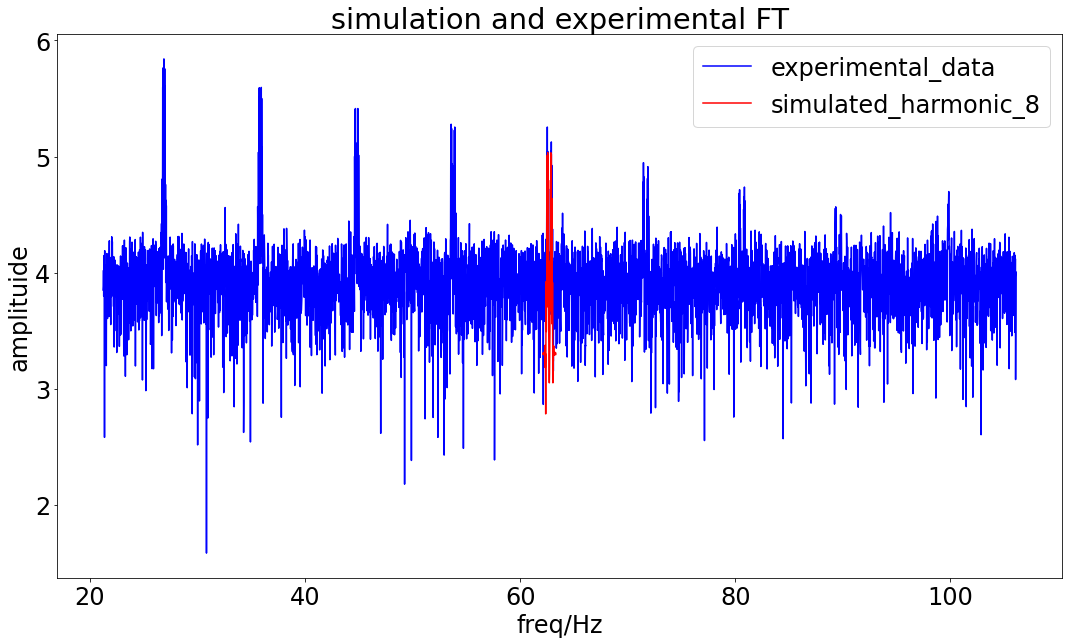

sim_plot.shape: (65,)
mid_upper_sim_plot.shape: (33,)
lower_sim_plot.shape: (32,)
sim_plot.shape: (65,)
mid_upper_sim_plot.shape: (33,)
lower_sim_plot.shape: (32,)
sim_plot.shape: (65,)
mid_upper_sim_plot.shape: (33,)
lower_sim_plot.shape: (32,)
sim_plot.shape: (65,)
mid_upper_sim_plot.shape: (33,)
lower_sim_plot.shape: (32,)


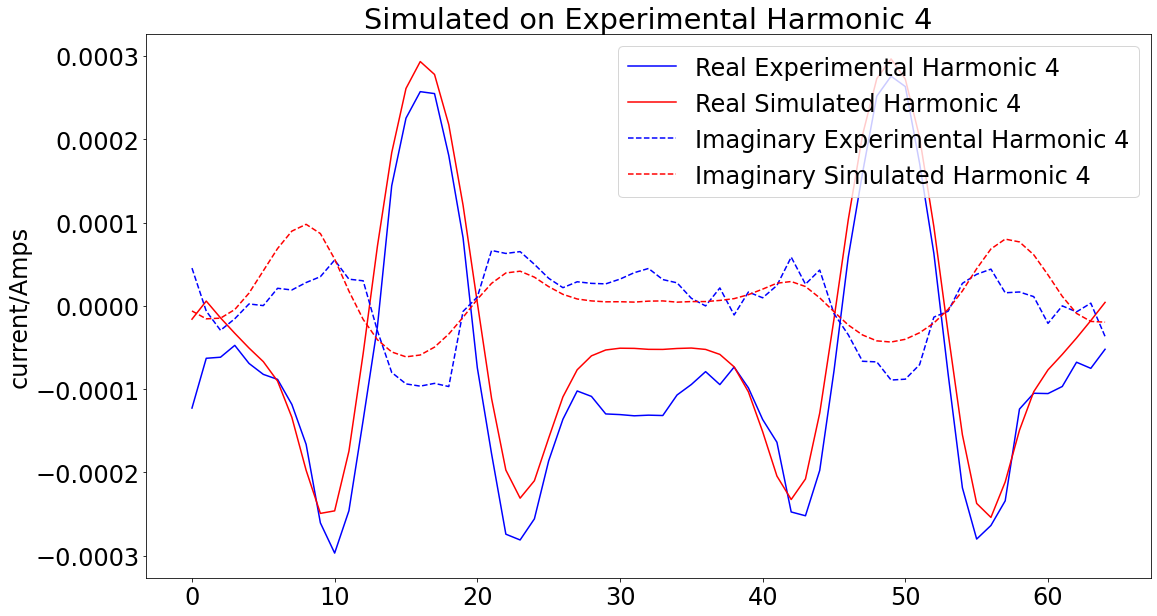

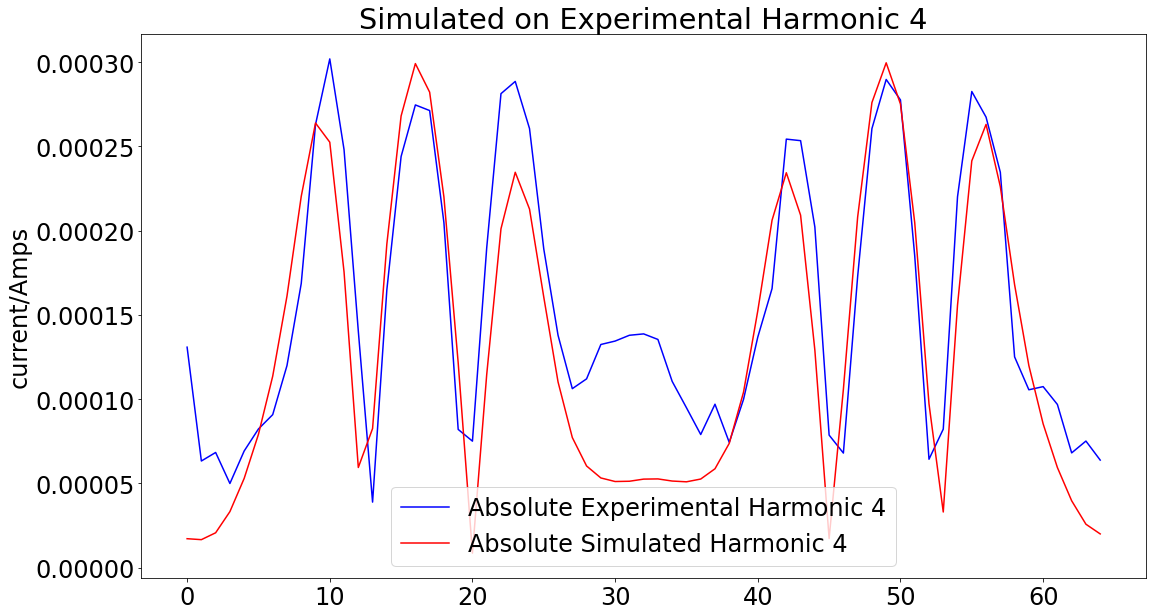

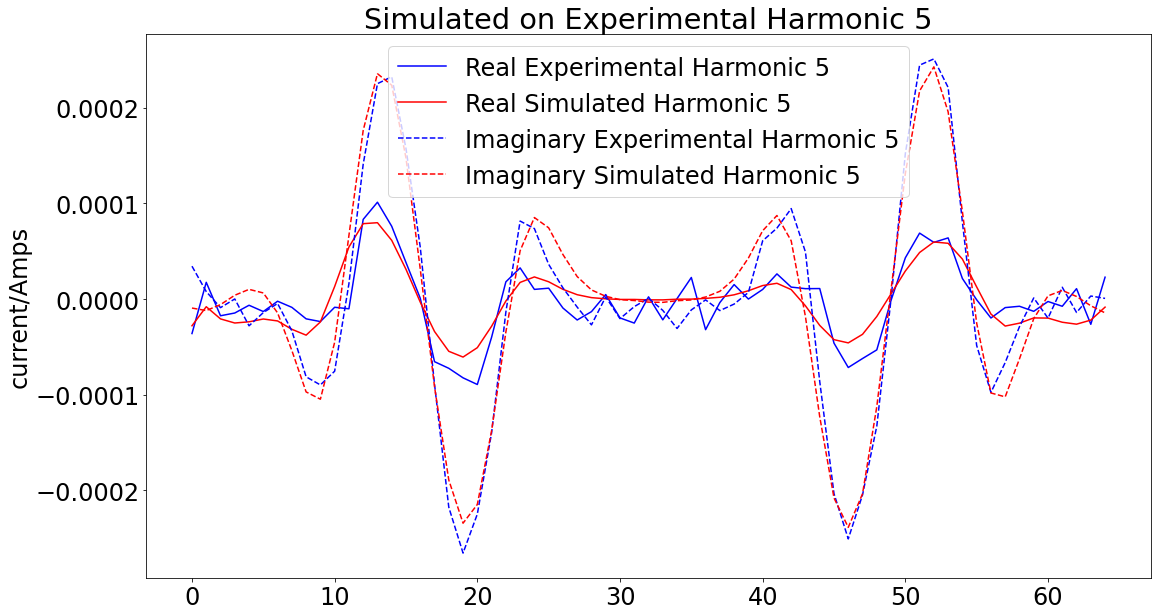

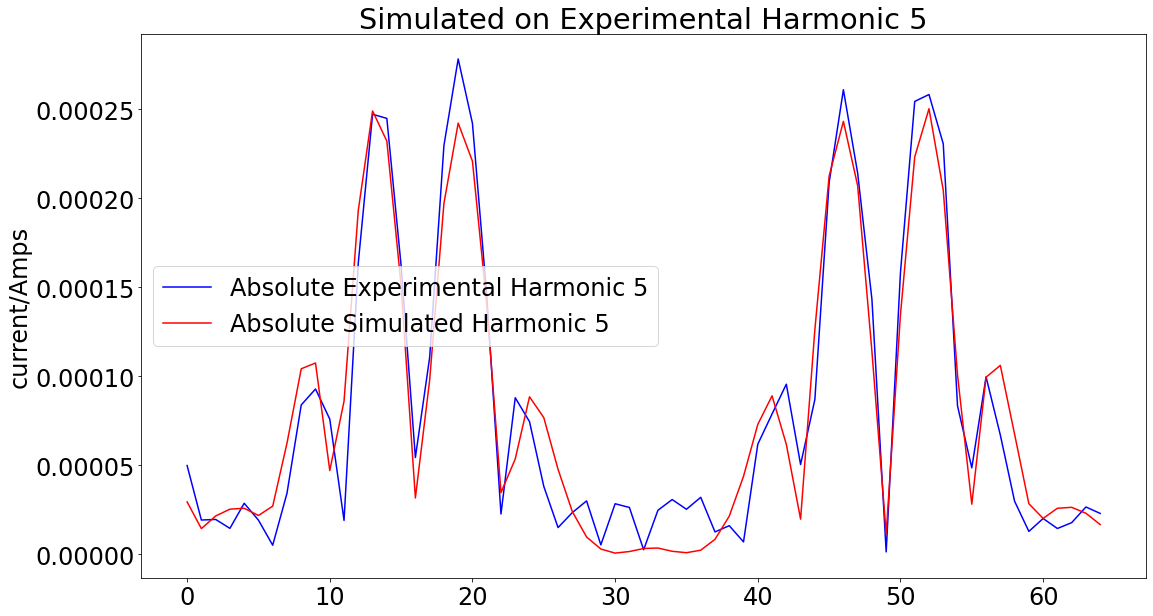

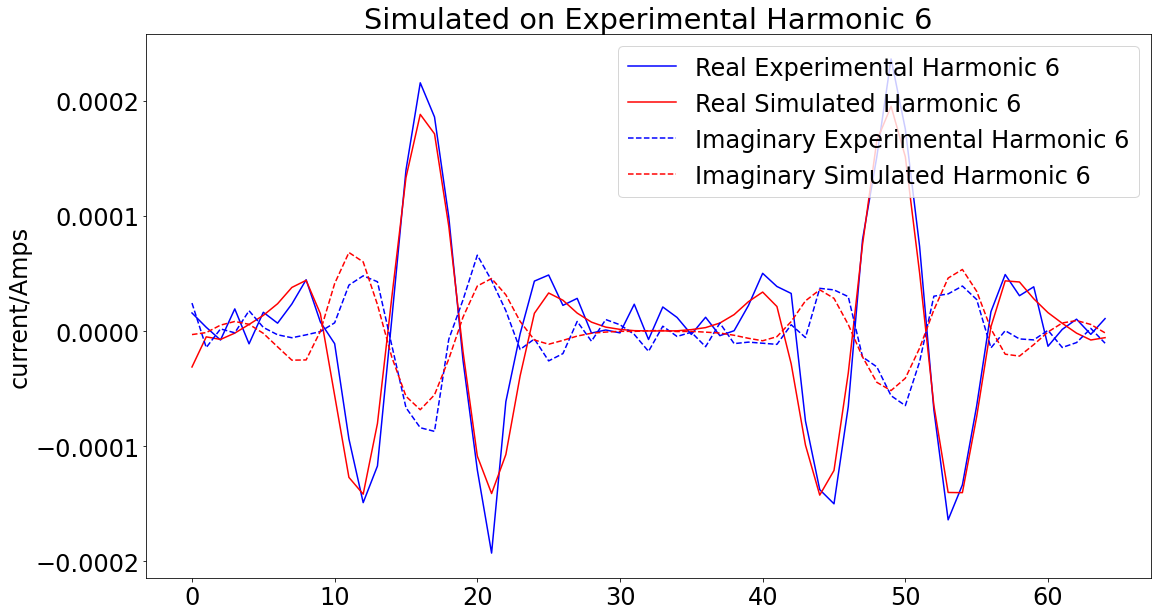

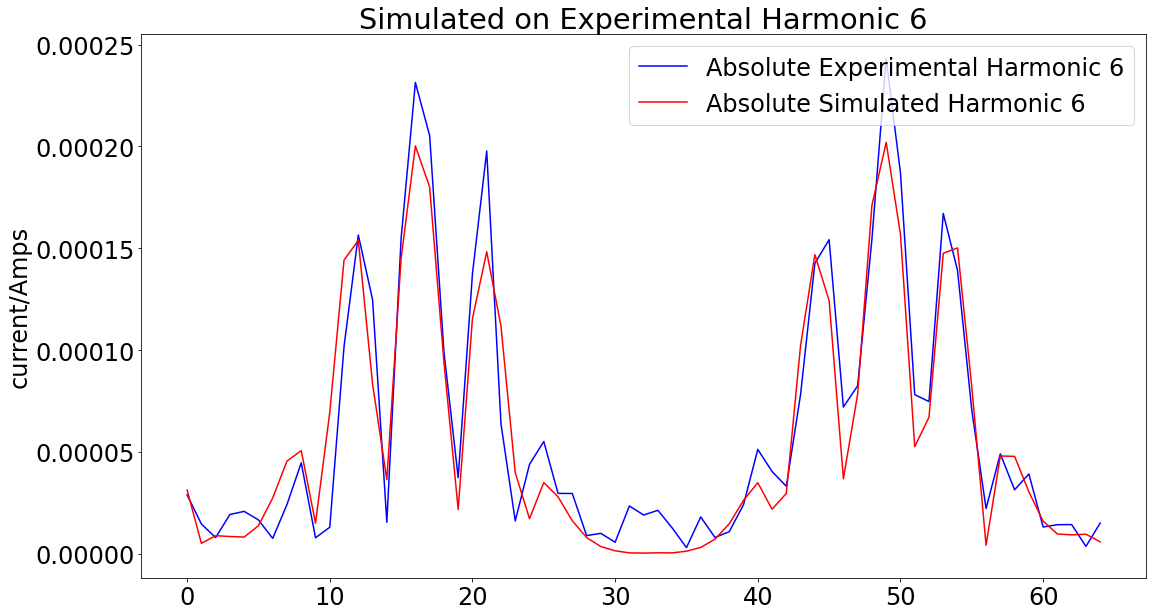

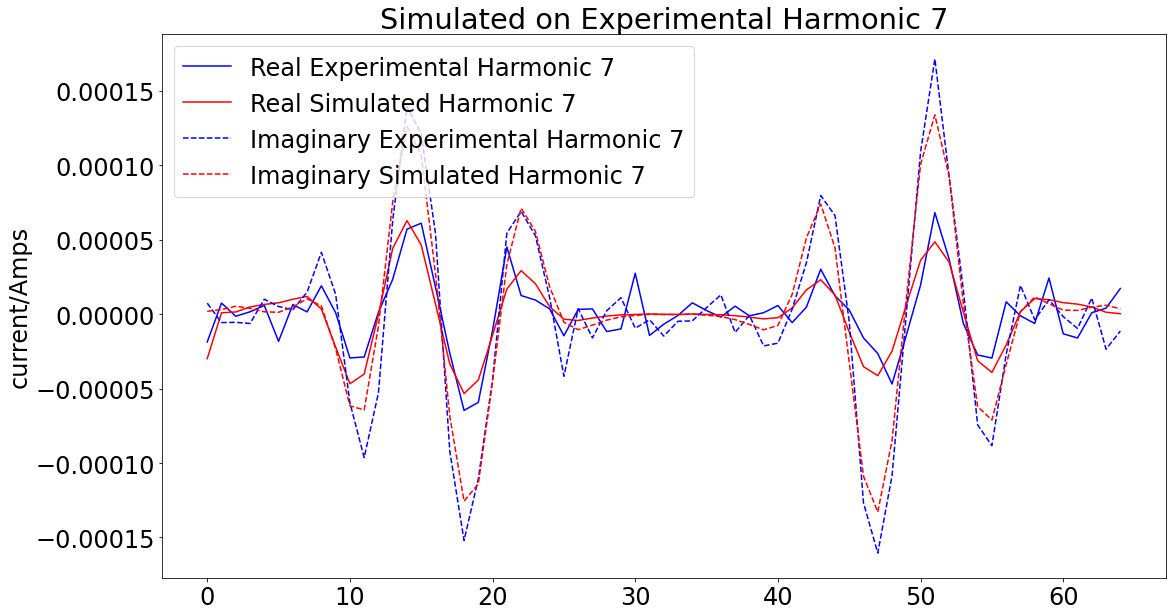

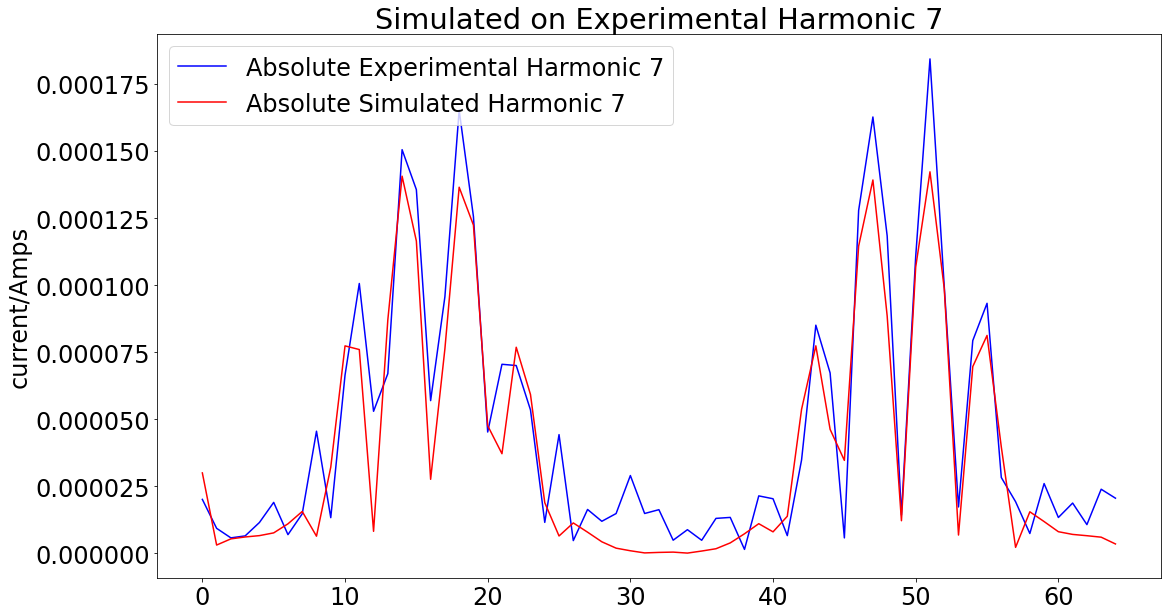

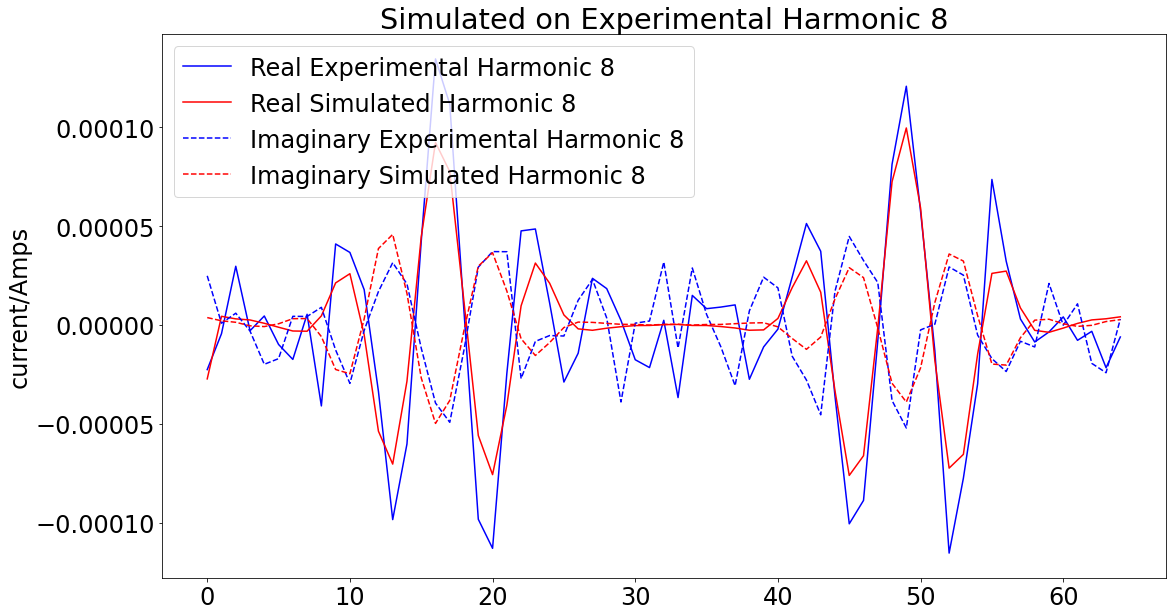

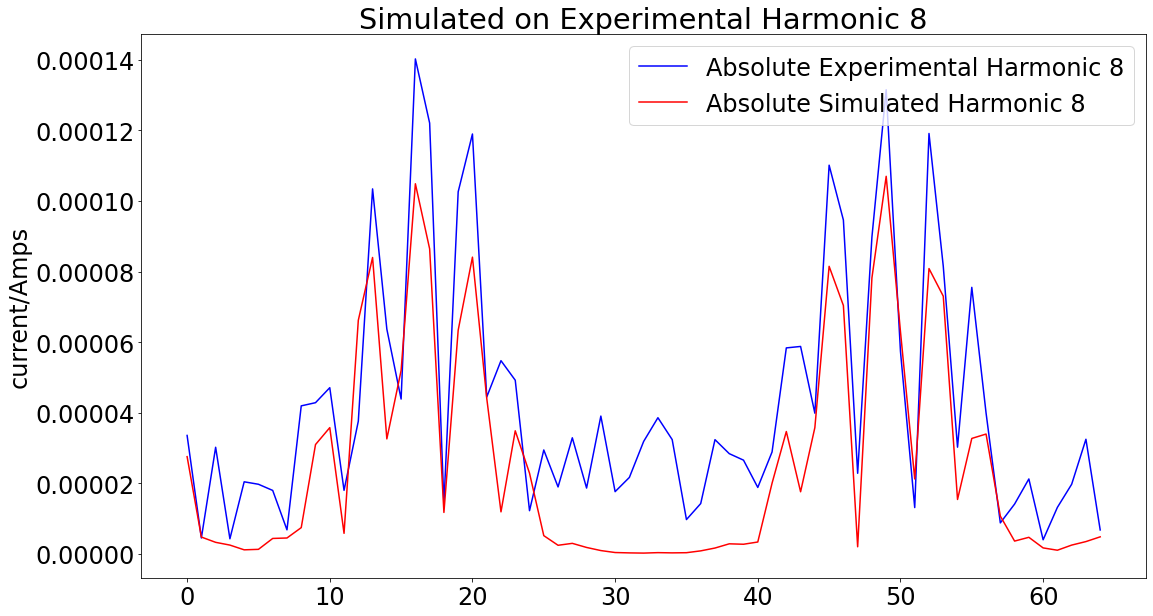

In [15]:
real_parameters = [3.63797445569529376e+00, 3.99999999763002734e+03, -2.70000000000016727e-01, -4.48542730136352485e-01, -3.46272673434245837e-02, 1.97456736893905527e+00]
print_all_harmonics = False
print_these_harmonics = [4,5,6,7,8]
model.ploting_harmonic(experimental_data = exp_current_dimless, times = exp_times, parameter_for_sim = real_parameters, Hz_interval = 0.60, print_all_harmonics= print_all_harmonics, print_these_harmonics = print_these_harmonics, check_FT_harmonic_locations = True)

**********cacluating harmonic spacing**********
arg max give :  481
spacing bewteen harmonics is therefore :  480


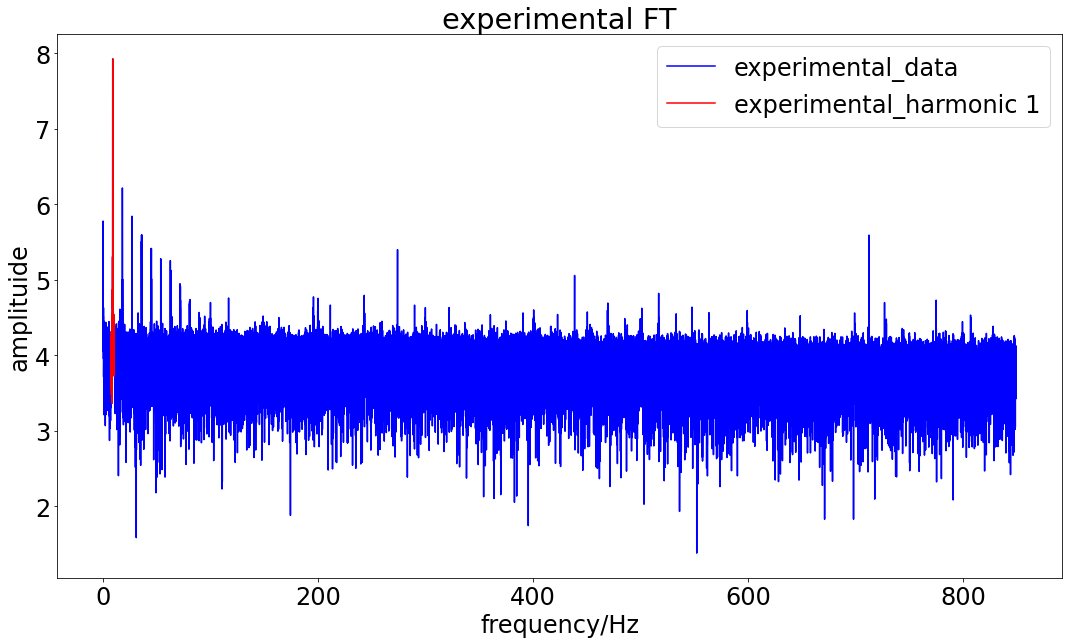

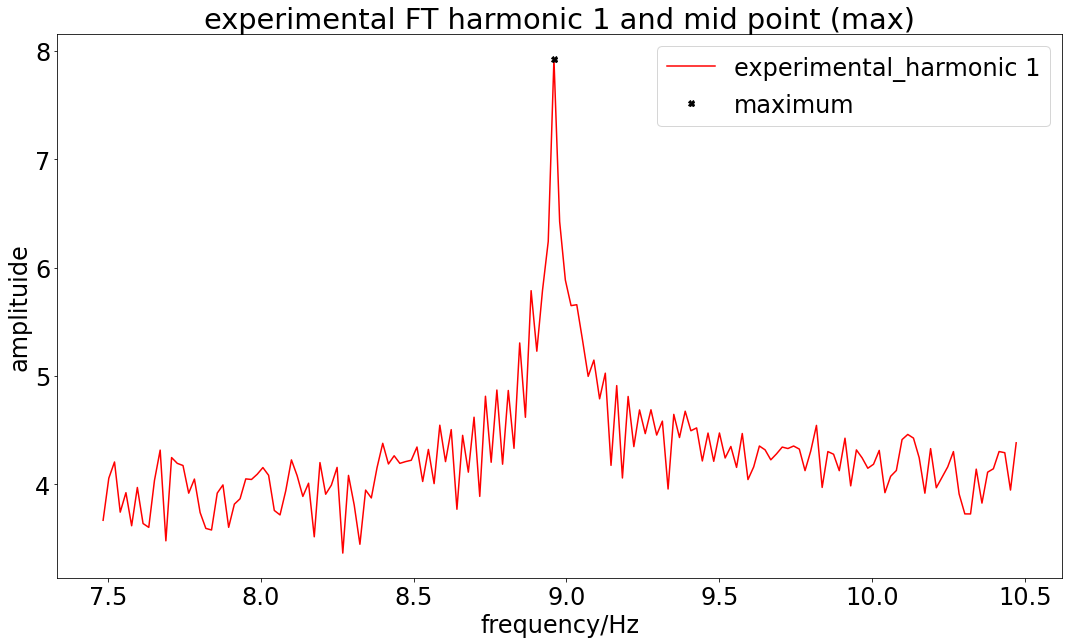

Spacing between harmonics:  480

**********cacluating location of 4th harmonic**********
mid point index of 4th harmonic:  303

**********index distance of 1.0Hz**********
index window covering 1.0Hz:  53.576089599999996
int index window covering 1.0Hz:  54.0


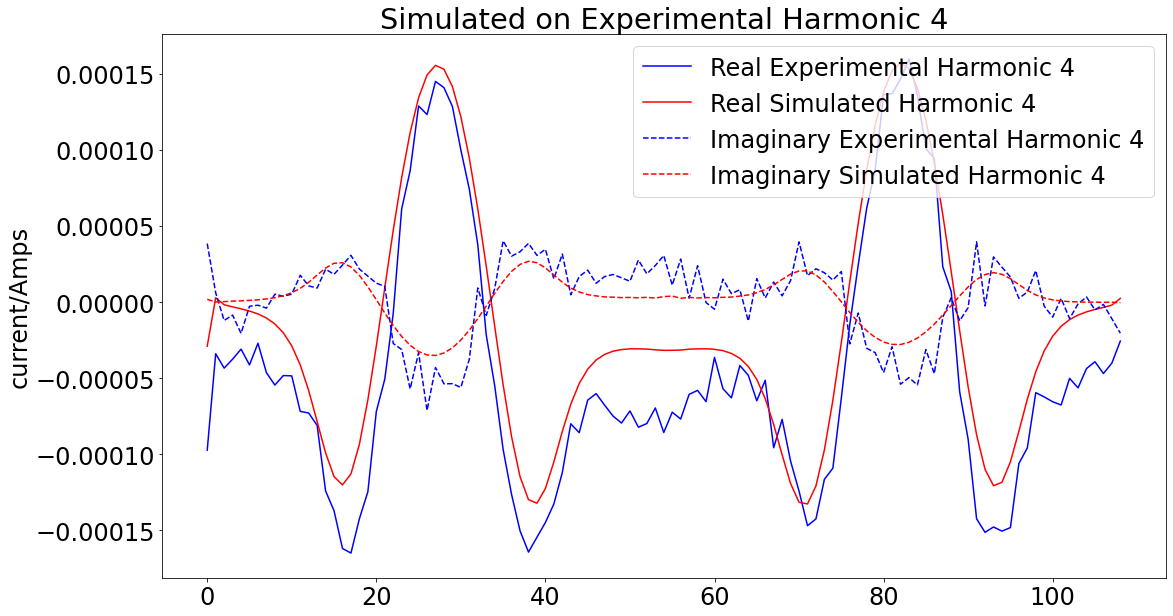

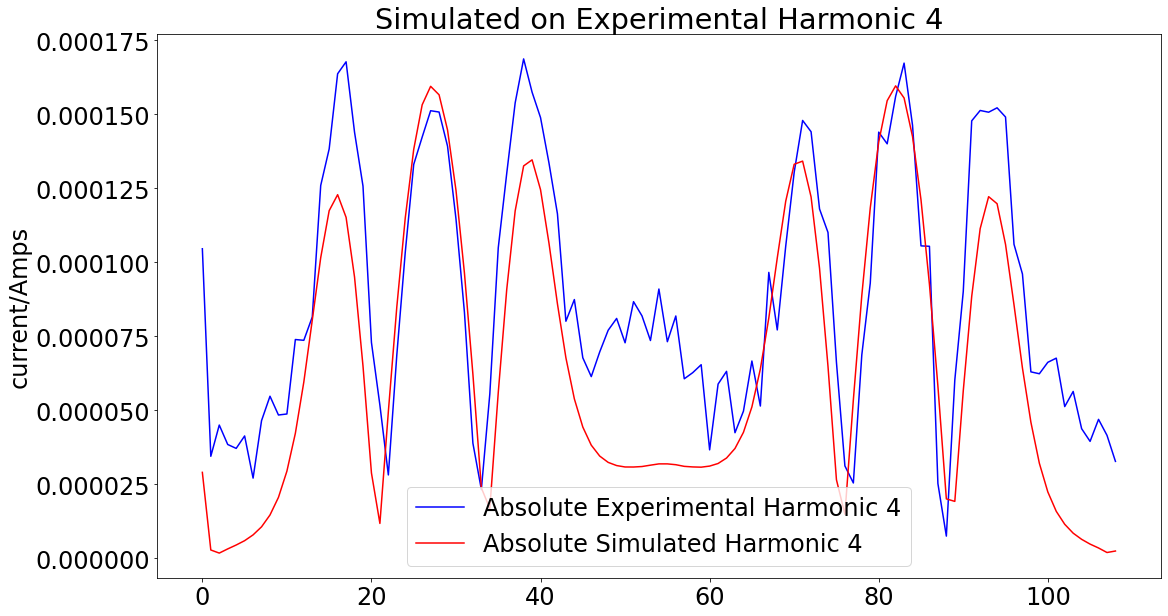

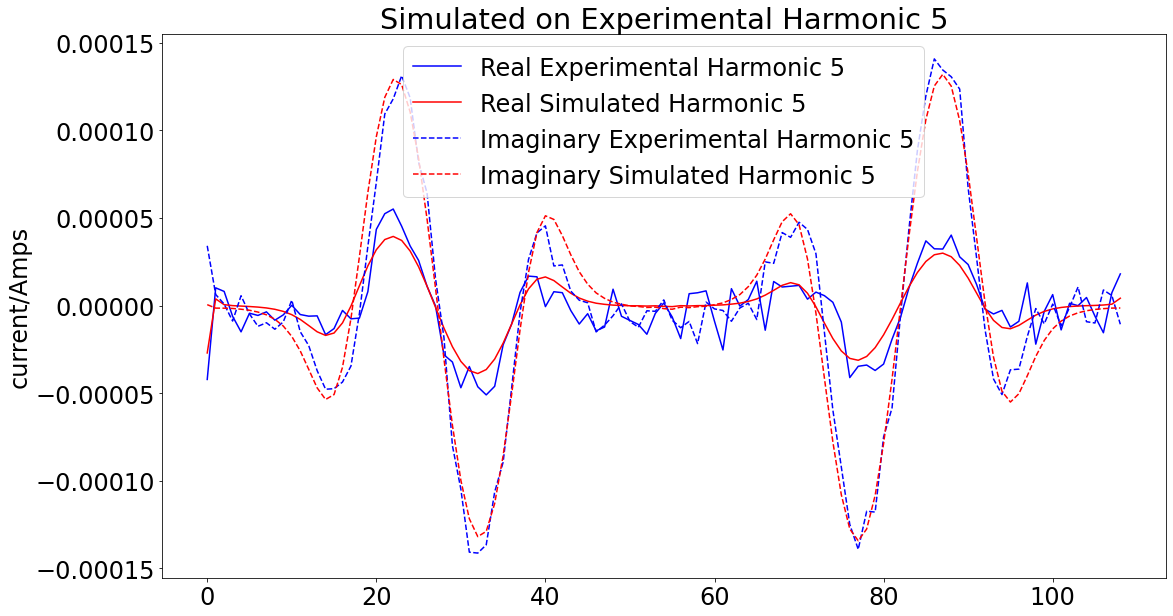

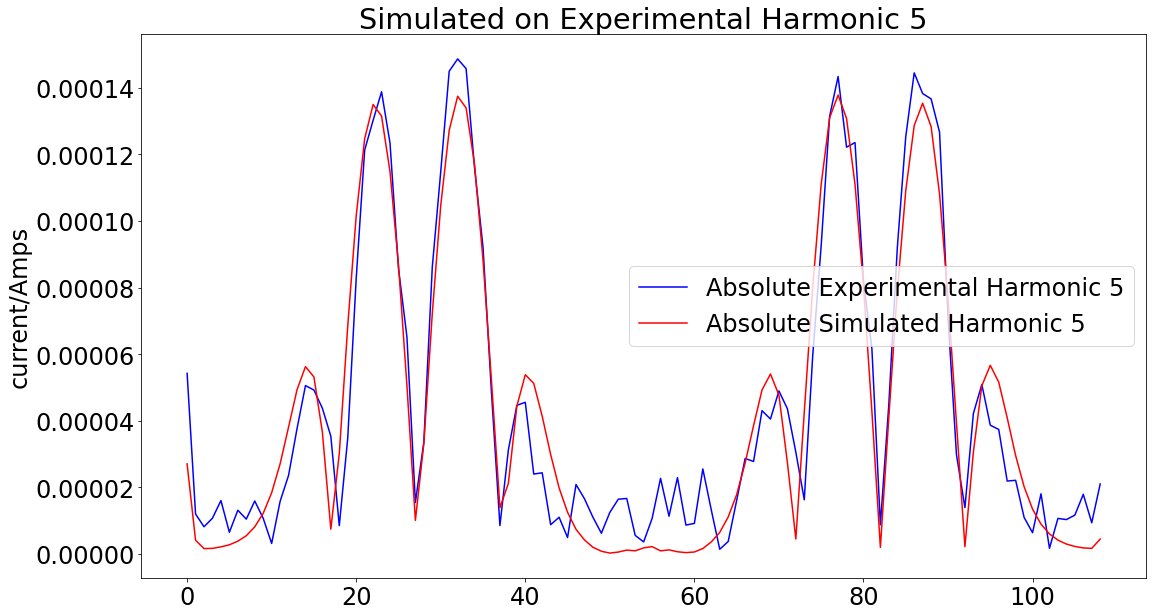

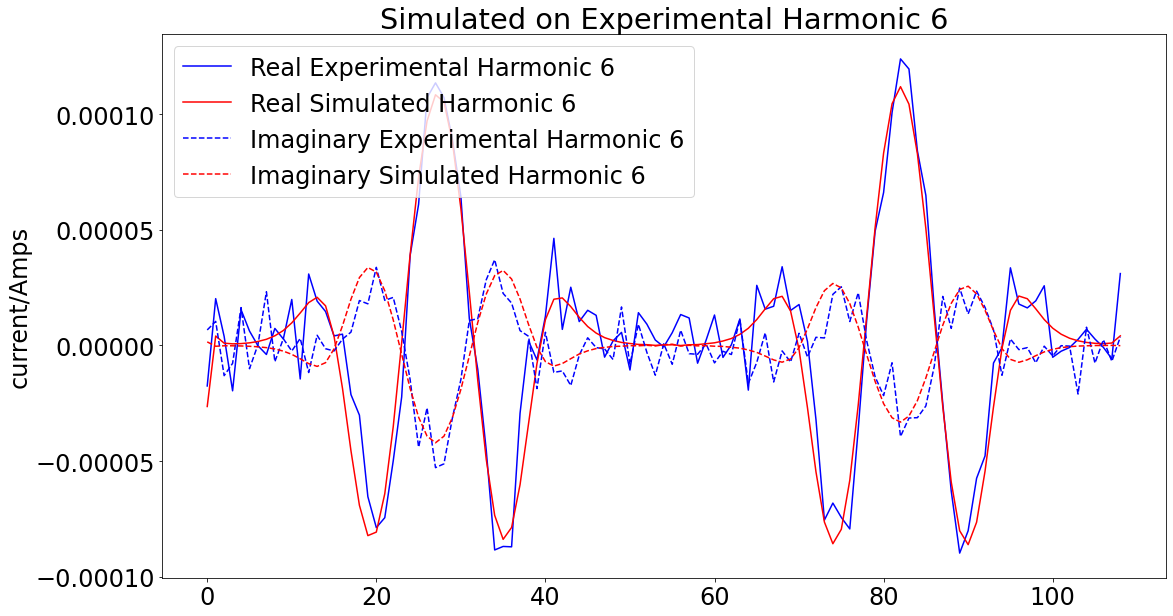

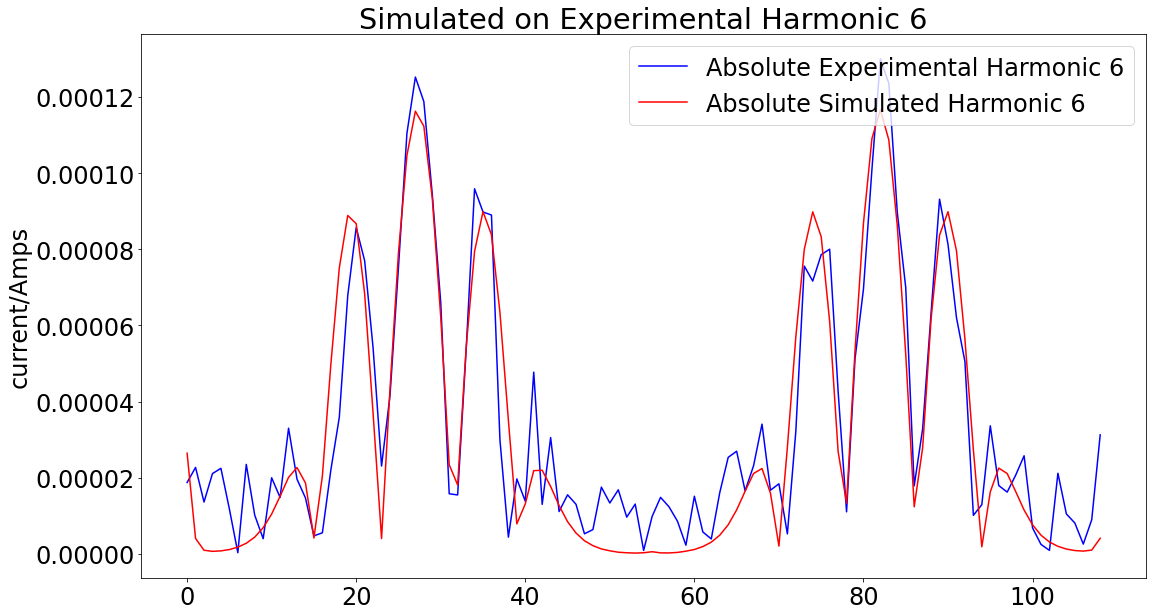

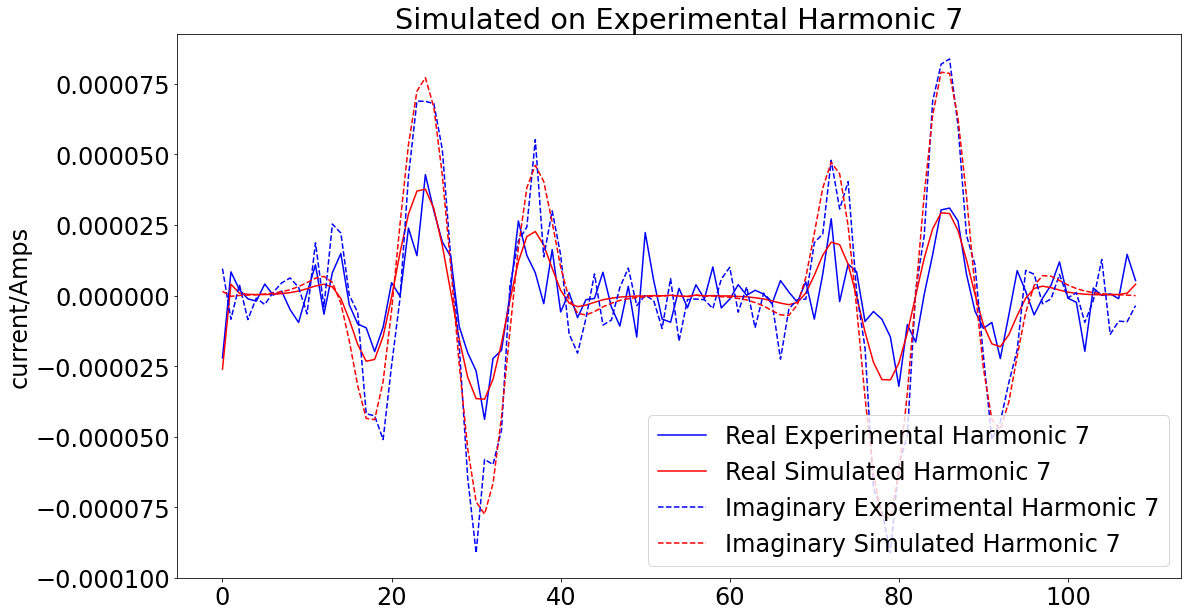

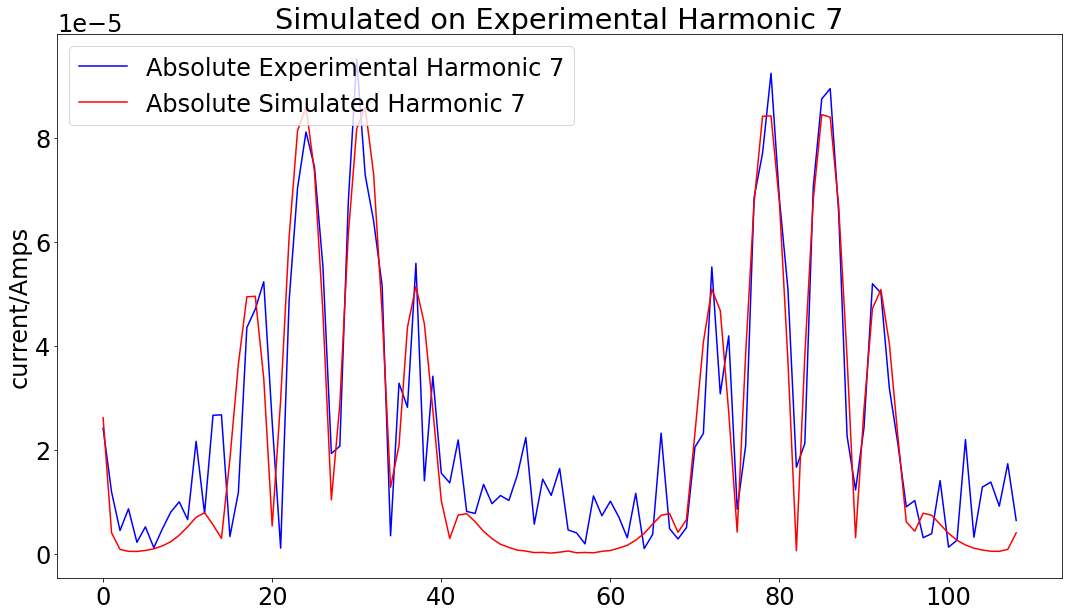

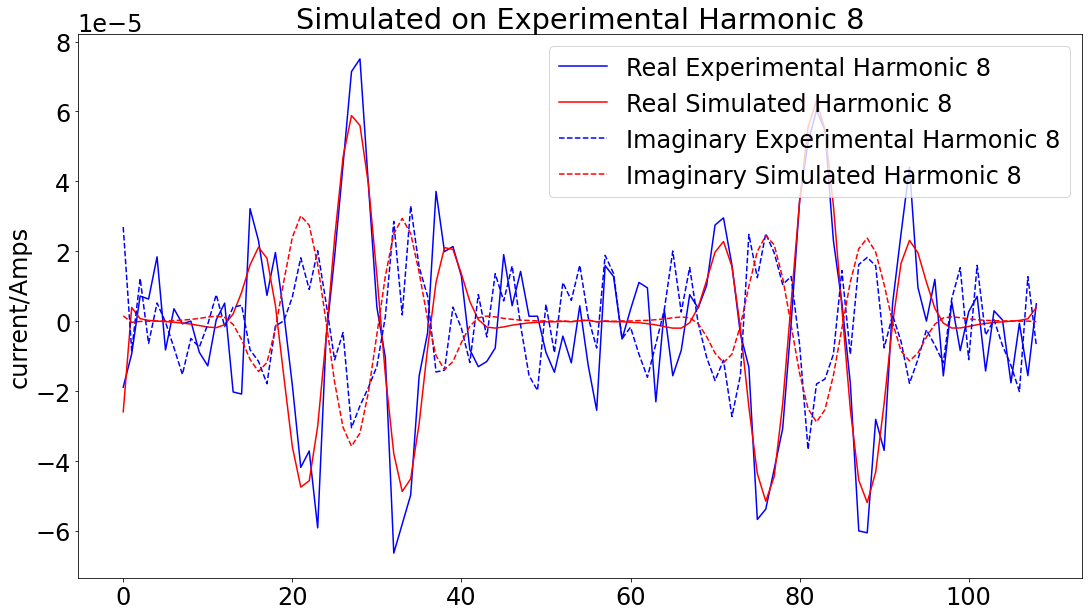

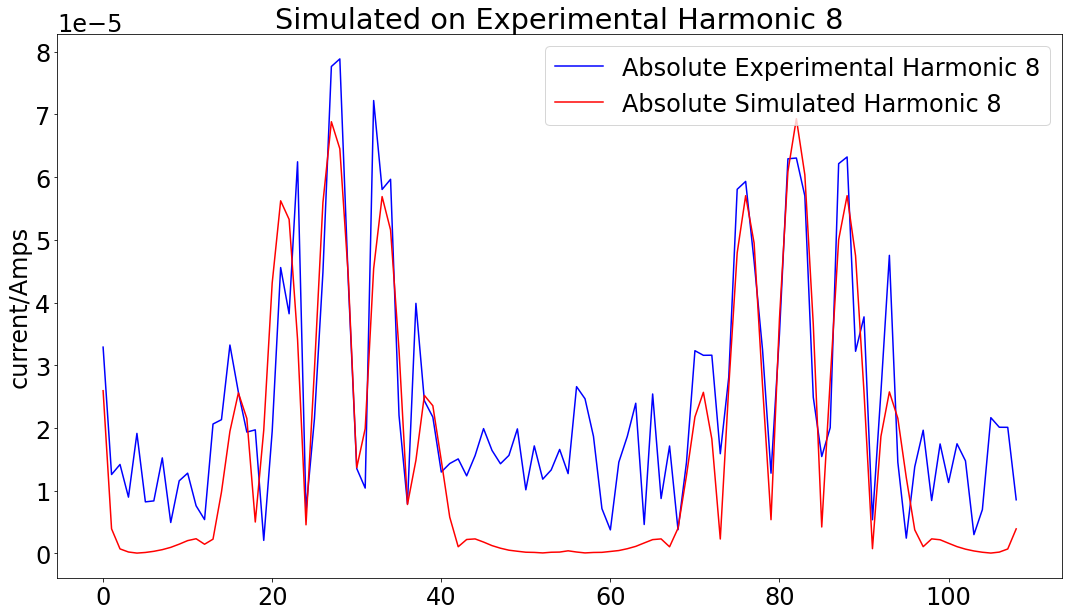

In [16]:
real_parameters = [1.78086989764817667e+03,  3.99999999992993071e+03, -4.38366482402984092e-01, -4.60170964424274853e-01, -3.41937244411527619e-02,  9.15176871867342534e-01]

model.ploting_harmonic(experimental_data = exp_current_dimless, times = exp_times, parameter_for_sim = real_parameters, Hz_interval = 1.0, print_all_harmonics= print_all_harmonics, print_these_harmonics = print_these_harmonics)